<a href="https://colab.research.google.com/github/RozhanMk/Time-Series-Analysis/blob/master/Naive_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Naive forecast as baseline model

In [ ]:
%pip install yfinance

In [ ]:
import yfinance as yf

stock_data = yf.download("RELIANCE.NS", start="2020-01-01", end="2022-05-31")

[*********************100%***********************]  1 of 1 completed


In [ ]:
stock_data.head()

Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2020-01-01,678.021362,685.881324,676.179942,681.794149,14004468
2020-01-02,689.564270,692.101927,679.099312,679.099312,17710316
2020-01-03,690.395203,692.416334,684.039846,688.531236,20984698
2020-01-06,674.383484,686.240737,672.811479,682.692574,24519177
2020-01-07,684.758606,689.205083,679.773116,682.243375,16683622


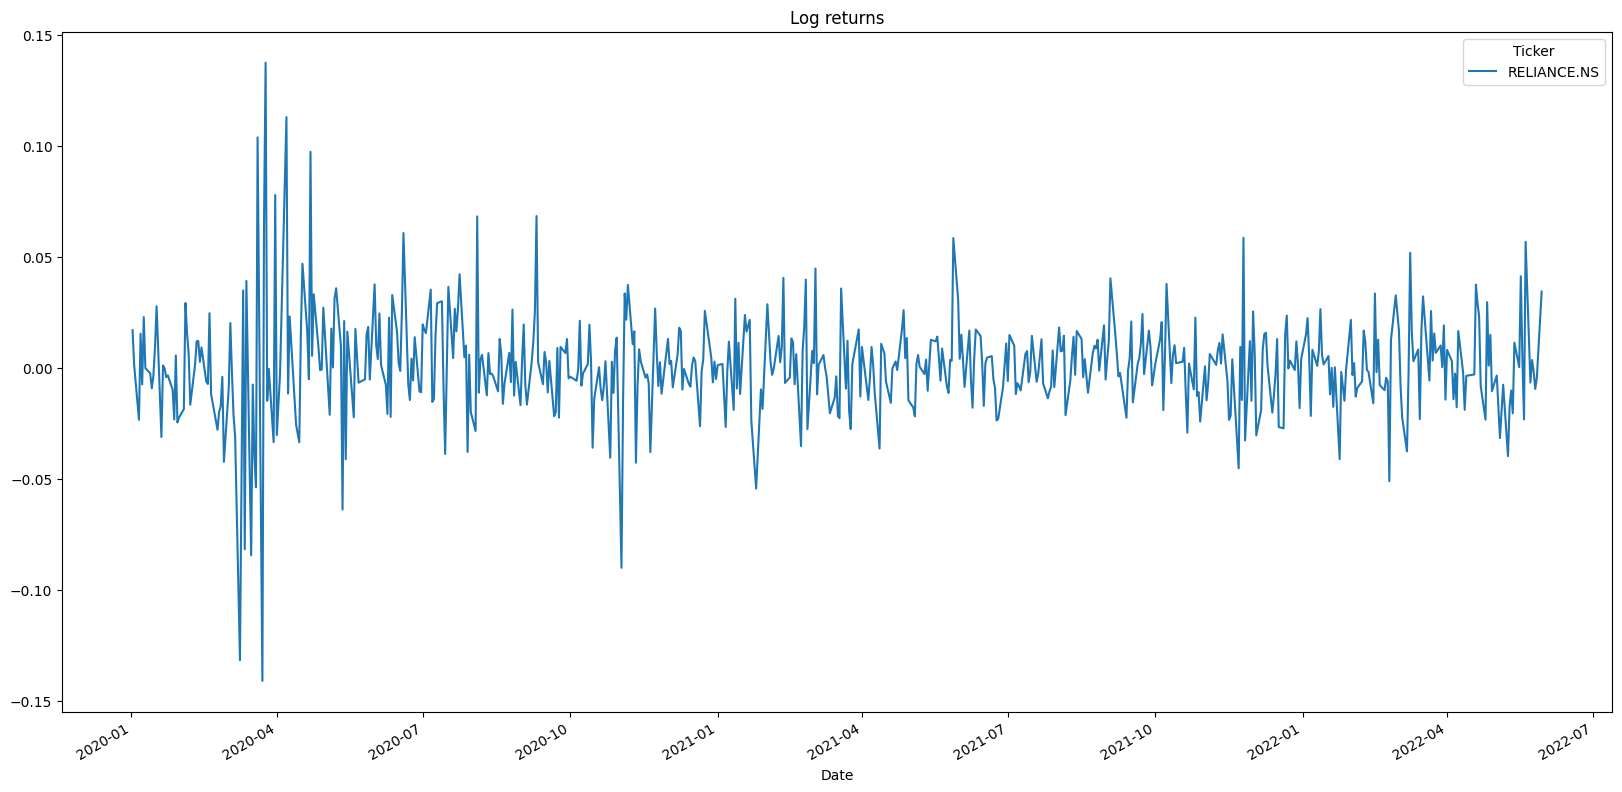

In [ ]:
# prompt: get return of the close column
np.log(stock_data['Close'].pct_change() + 1).plot(figsize=(20, 10))
plt.title("Log returns");

In [ ]:
close_prices = stock_data['Close']
close_predicted_prices = close_prices.shift(1)

In [ ]:
close_predicted_prices.head()

Ticker,RELIANCE.NS
Date,
2020-01-01,NaN
2020-01-02,678.021362
2020-01-03,689.564270
2020-01-06,690.395203
2020-01-07,674.383484


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
import numpy as np

actual_prices = close_prices[1:]
predicted_prices = close_predicted_prices[1:]

# Calculate evaluation metrics
mape = mean_absolute_percentage_error(actual_prices, predicted_prices) * 100
rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))
r2 = r2_score(actual_prices, predicted_prices)

print(f"MAPE: {mape:.2f}%")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

MAPE: 1.55%
RMSE: 18.56
R2 Score: 0.99


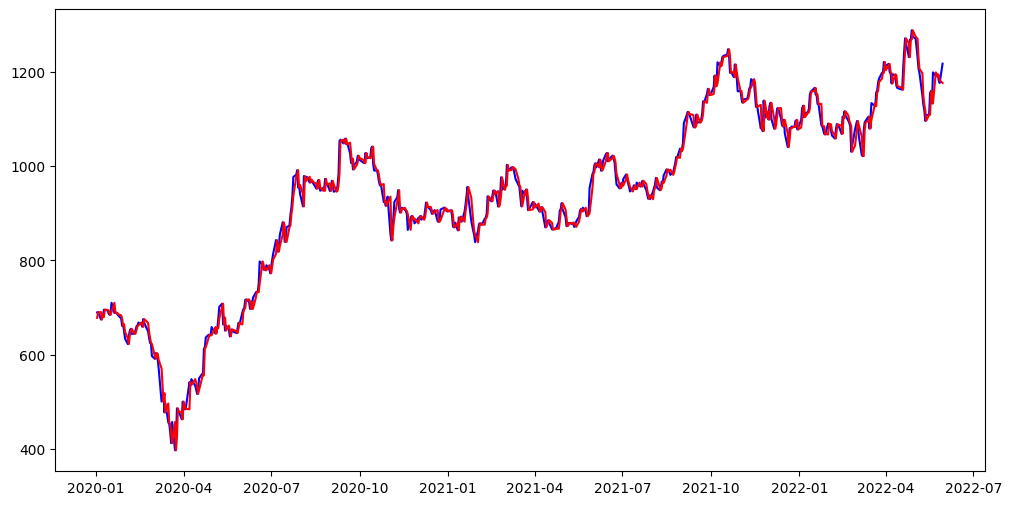

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(actual_prices.index, actual_prices, label='Actual Prices', color='blue')
plt.plot(predicted_prices.index, predicted_prices, label='Predicted Prices', color='red')

## Simple Moving Average

In [ ]:
import matplotlib.pyplot as plt

window_size = 3 # Define the window size for the moving average
sma_predicted_prices = close_prices.rolling(window=window_size).mean().shift(1)
sma_predicted_prices

Ticker,RELIANCE.NS
Date,
2020-01-01,NaN
2020-01-02,NaN
2020-01-03,NaN
2020-01-06,685.993612
2020-01-07,684.780986
...,...
2022-05-24,1174.234049
2022-05-25,1194.943685
2022-05-26,1193.047852


In [ ]:
sma_actual_prices = close_prices[window_size:]
sma_predicted_prices = sma_predicted_prices[window_size:]

# Calculate evaluation metrics for SMA
sma_mape = mean_absolute_percentage_error(sma_actual_prices, sma_predicted_prices) * 100
sma_rmse = np.sqrt(mean_squared_error(sma_actual_prices, sma_predicted_prices))
sma_r2 = r2_score(sma_actual_prices, sma_predicted_prices)

print(f"\nSimple Moving Average (Window Size: {window_size}) Metrics:")
print(f"MAPE: {sma_mape:.2f}%")
print(f"RMSE: {sma_rmse:.2f}")
print(f"R2 Score: {sma_r2:.2f}")


Simple Moving Average (Window Size: 3) Metrics:
MAPE: 2.01%
RMSE: 23.43
R2 Score: 0.98


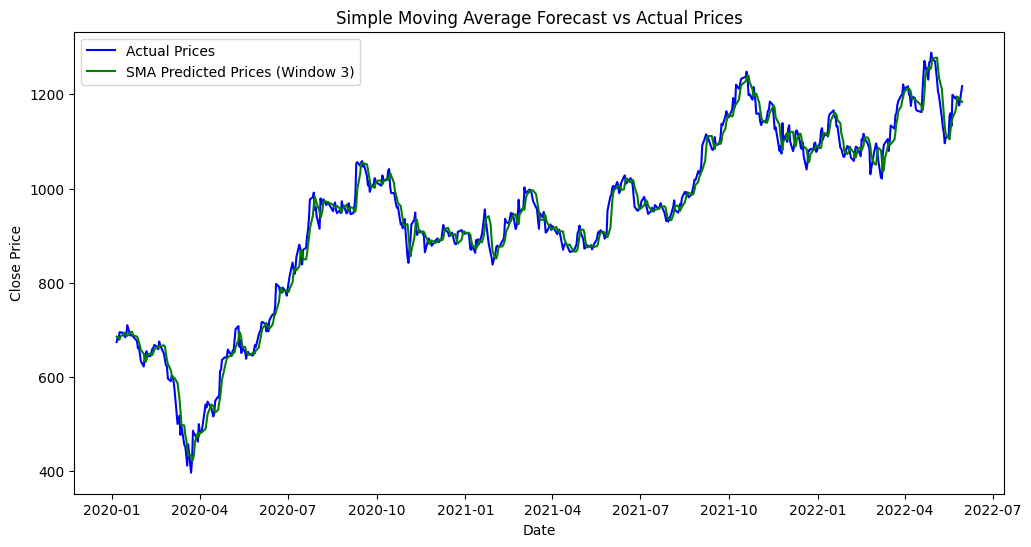

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(sma_actual_prices.index, sma_actual_prices, label='Actual Prices', color='blue')
plt.plot(sma_predicted_prices.index, sma_predicted_prices, label=f'SMA Predicted Prices (Window {window_size})', color='green')
plt.title('Simple Moving Average Forecast vs Actual Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

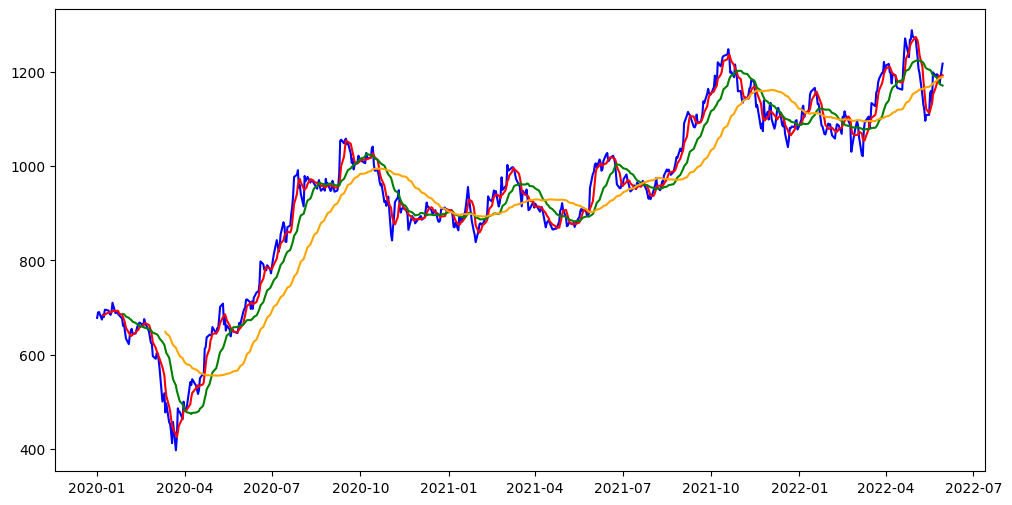

In [ ]:
stock_data["SMA-5"] = stock_data["Close"].rolling(window=5).mean()
stock_data["SMA-20"] = stock_data["Close"].rolling(window=20).mean()
stock_data["SMA-50"] = stock_data["Close"].rolling(window=50).mean()

plt.figure(figsize=(12, 6))
plt.plot(stock_data["Close"], label="Close Price", color="blue")
plt.plot(stock_data["SMA-5"], label="SMA-5", color="red")
plt.plot(stock_data["SMA-20"], label="SMA-20", color="green")
plt.plot(stock_data["SMA-50"], label="SMA-50", color="orange")